# Thera Bank Personal Loan Campaign

### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
ID: Customer ID<br>
Age: Customer's age in completed years<br>
Experience: #years of professional experience<br>
Income: Annual income of the customer <br>
ZIP Code: Home Address ZIP code.<br>
Family: Family size of the customer<br>
CCAvg: Avg. spending on credit cards per month<br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
Mortgage: Value of house mortgage if any. <br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
Securities Account: Does the customer have a securities account with the bank?<br>
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
Online: Does the customer use internet banking facilities? <br>
Credit card: Does the customer use a credit card issued by the bank?<br>

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.


### Steps and tasks:

Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)<br>
EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)<br><br>
Number of unique in each column?<br>
Number of people with zero mortgage?<br>
Number of people with zero credit card spending per month?<br>
Value counts of all categorical columns.<br>
Univariate and Bivariate<br>
Get data model ready<br><br>
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)<br>
Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score).<br> Draw a heatmap to display confusion matrix (15 marks)<br><br>
Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)<br>
Give conclusion related to the Business understanding of your model? (5 marks)

## Import Libraries

In [160]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and review data

In [161]:
#Load data
loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [162]:
loan.shape # Check number of columns and rows in data frame

(5000, 14)

In [163]:
loan.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [164]:
# Checking whether there are any null values in data set
loan.isnull().values.any() 

False

In [165]:
#Checking data types
print (loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [166]:
#Statistical summary
loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# <a id='link2'>Data Visualization and EDA</a>

##  Univariate

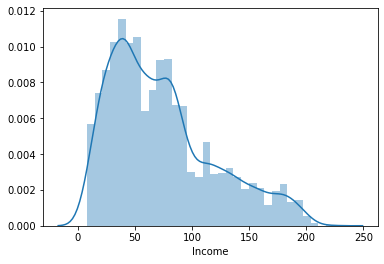

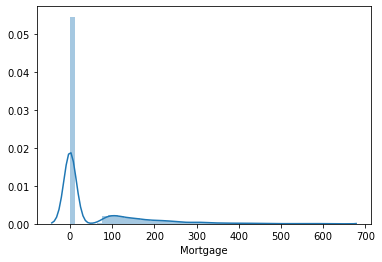

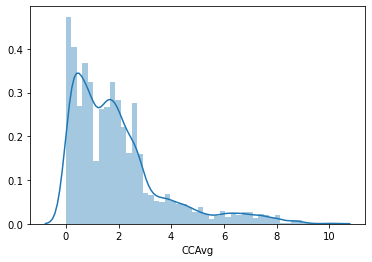

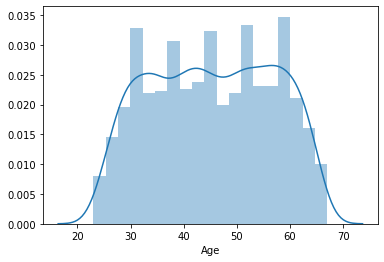

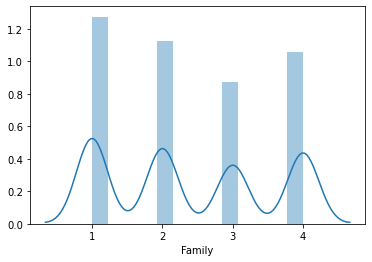

In [167]:
# distplot for continous columns
for i in ['Income','Mortgage','CCAvg','Age','Family']:
    sns.distplot(loan[i])
    plt.show()

**Insights:**
- The three are skewed as expected for bank customers. Modifying the data will increase bias.


## Bivariate

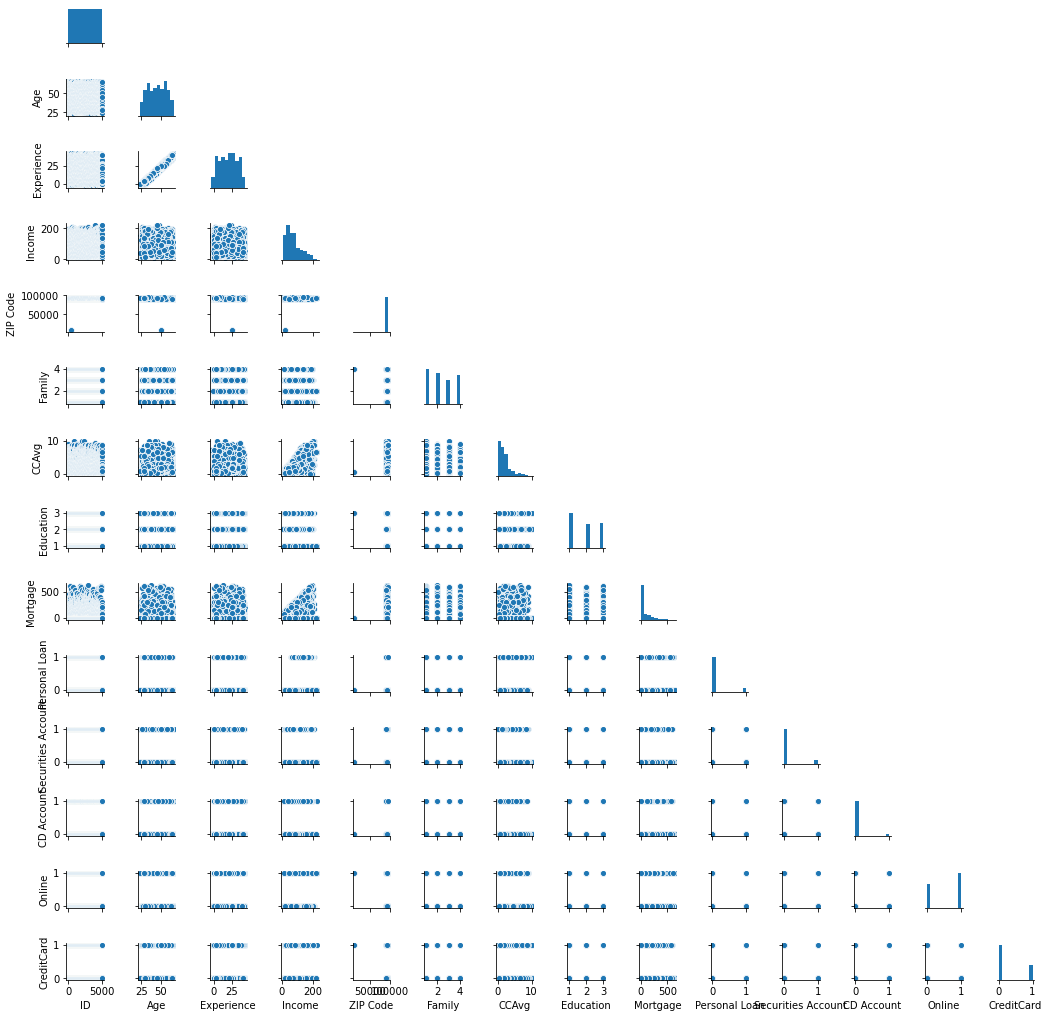

In [168]:
#Pairplot
sns.pairplot(loan, height=1, diag_kind='auto', corner=True)
plt.show()

<b>Insights:</b><br>
There is a linear relationship between age and experience. Only one of the features should be included in the model.<br>


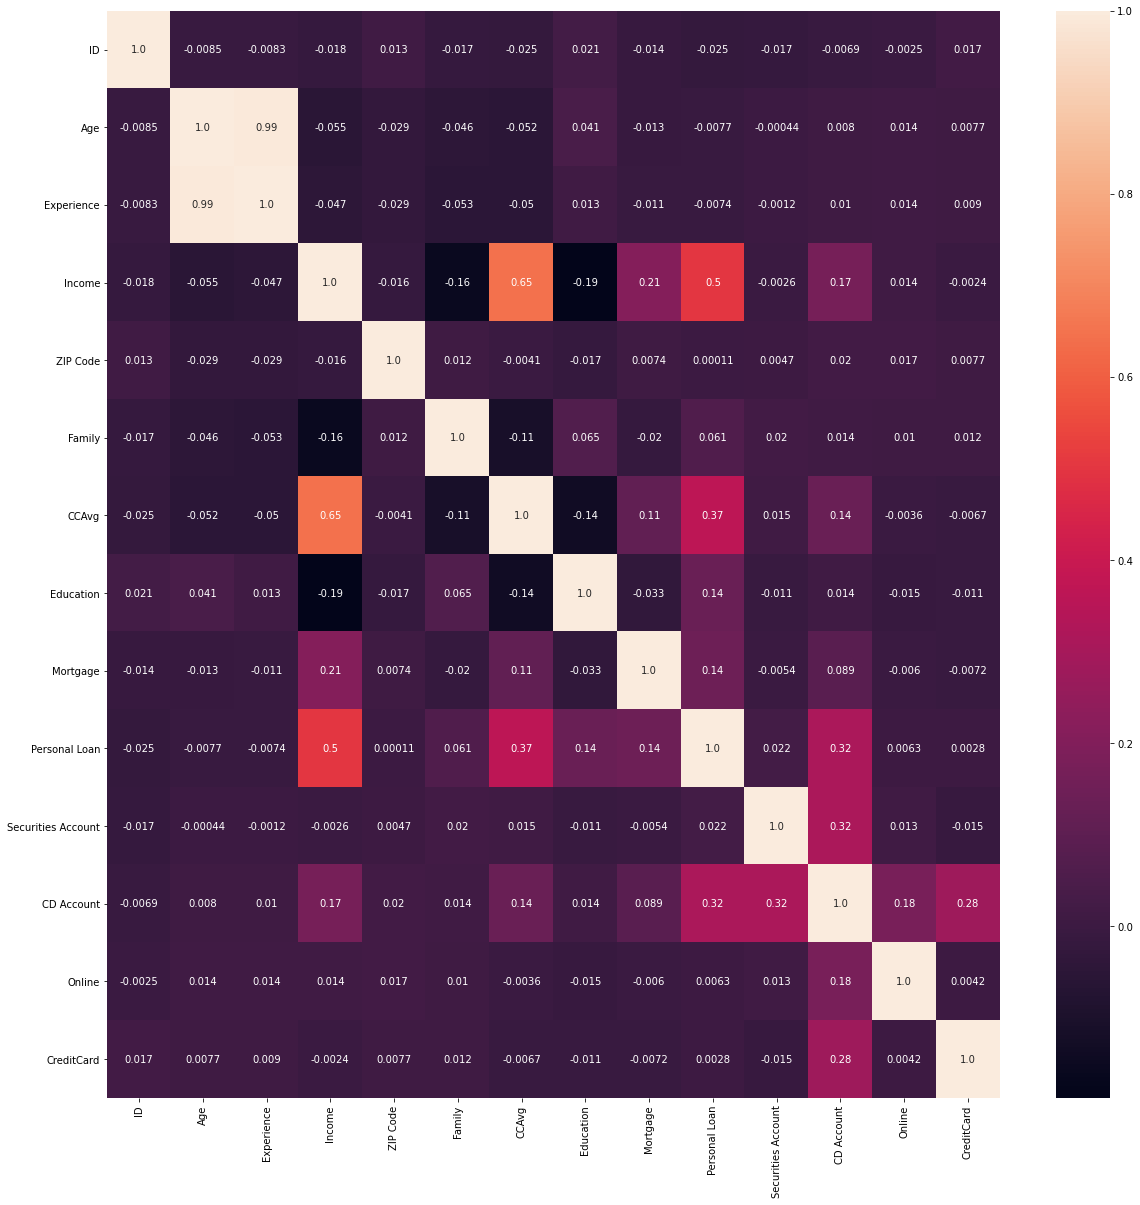

In [169]:
#Heatmap to visualize correlation
plt.figure(figsize=(20,20))
sns.heatmap(loan.corr(), annot=True, fmt=".2")
plt.show()

In [170]:
#Different view of the above correlation as pertains Personal Loan
loan[loan.columns[:]].corr()['Personal Loan'][:]

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

<b>Insights:</b><br>
Shows that age and experience are highly correlated. Only one of them should be included in the model.<br>
Income and CCAvg are also correlated. We may consider only using one of them in the model.<br>

In [171]:
# Checking the number of unique values in each column of the dataframe.
loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [172]:
#Checking number of people with zero mortgage
loan[(loan['Mortgage']==0)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [197]:
pd.crosstab(loan['Family'],loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


**Insights:**
- `A customer with a family size of 1 has a slightly high chance of not accepting a loan. We will check how this feature influences final model using coefficients`

In [198]:
pd.crosstab(loan['Education'],loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


**Insights:**
- `A customer with an Advanced/Professional education has a slightly higher likelihood of acceptig a loan. We will check how this feature influences final model using coefficients`

In [173]:
#Checking number of people with zero credit card spending per month
loan[(loan['CCAvg']==0)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17,32,94523,4,0.0,2,0,0,0,0,1,0
128,129,38,14,74,92182,2,0.0,1,0,0,1,0,1,0
198,199,27,3,59,94123,4,0.0,1,90,0,1,0,1,0
210,211,51,26,20,92131,2,0.0,1,0,0,0,0,0,0
215,216,38,14,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10,88,94404,2,0.0,1,121,0,0,0,1,0
4826,4827,56,31,81,93943,2,0.0,3,225,0,0,0,0,0
4837,4838,36,10,183,95348,2,0.0,1,0,0,0,0,0,0
4910,4911,48,22,120,90291,1,0.0,1,0,0,0,0,1,0


In [174]:
#Personal loan value counts
loan['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [175]:
#Securities Account value counts
loan['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [176]:
#CD Account value counts
loan['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [177]:
#Online value counts
loan['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [178]:
#Credit card value counts
loan['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [179]:
#Education value counts
loan['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

# <a id='link3'>Data Preparation</a>

In [180]:
#Drop experience as it is not needed for the model as indicated above. 
del loan['Experience']


In [181]:
# dropping this column as there will be 1-1 mapping anyways
del loan['ID']

In [182]:
#Convert the X & Y variables to a categorical variable wherever relevant
loan['Personal Loan'] = loan['Personal Loan'].astype('category')
loan['Education'] = loan['Education'].astype('category')
loan['CCAvg'] = loan['CCAvg'].astype('category')

In [183]:
#Checking data types
print (loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   ZIP Code            5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   category
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   int64   
 9   CD Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
dtypes: category(3), int64(9)
memory usage: 372.4 KB
None


## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [184]:
from sklearn.model_selection import train_test_split

X = loan.drop('Personal Loan', axis=1)
y = loan[['Personal Loan']].astype('category') 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()
print(X.head())
print(y.head())

   Age  Income  ZIP Code  Family CCAvg Education  Mortgage  \
0   25      49     91107       4   1.6         1         0   
1   45      34     90089       3   1.5         1         0   
2   39      11     94720       1   1.0         1         0   
3   35     100     94112       1   2.7         2         0   
4   35      45     91330       4   1.0         2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
  Personal Loan
0             0
1             0
2             0
3             0
4             0


In [185]:
print(X.shape)
print(y.shape)

(5000, 11)
(5000, 1)


Check the data split

In [186]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Checking Personal Loan True/False ratio in split data

In [187]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal Loan'] == 1]), (len(loan.loc[loan['Personal Loan'] == 1])/len(loan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal Loan'] == 0]), (len(loan.loc[loan['Personal Loan'] == 0])/len(loan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 3500 (100.00%)
Training Personal Loan False Values   : 3500 (100.00%)

Test Personal Loan True Values        : 1500 (100.00%)
Test Personal Loan False Values       : 1500 (100.00%)



# Logistic Regression

In [188]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,10,intercept
0,0.00448,0.035627,-0.000075,0.134,0.063289,0.149531,0.000811,0.004845,0.042912,-0.001963,-0.001139,-0.001079


In [189]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score


Above are the coefficients of all the attributes

In [190]:
#Add column names
dfnew = coef_df.rename(columns={0: 'Age', 1: 'Income', 2: 'ZIP Code', 3: 'Family', 4: 'CCAvg', 5: 'Education', 6: 'Mortgage', 7: 'Securities Account', 8: 'CD Account', 9: 'Online', 10: 'CreditCard'})
dfnew


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,intercept
0,0.00448,0.035627,-0.000075,0.134,0.063289,0.149531,0.000811,0.004845,0.042912,-0.001963,-0.001139,-0.001079


Above are attributes with column names

In [191]:
#For test data show all the rows where the predicted class is not equal to the observed class.
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test['Personal Loan']                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = model.predict_proba(x_test)[:,1]

z['Predicted'] = y_predict                               # Predicting target variable using sklearn Logistic regression

z[z['Actual']!=z['Predicted']] #Rows where the predicted class is not equal to the observed class

# In sklearn default threshold is 0.5
# therefore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
1513,0,0.410450,0.589550,1
4377,1,0.707700,0.292300,0
3988,1,0.938713,0.061287,0
3271,1,0.895048,0.104952,0
349,1,0.982851,0.017149,0
...,...,...,...,...
4563,0,0.356446,0.643554,1
351,1,0.527207,0.472793,0
421,1,0.843254,0.156746,0
3651,1,0.708900,0.291100,0


In [192]:
#Model score or accuracy
model_score = model.score(x_test, y_test)
print(model_score)

0.916


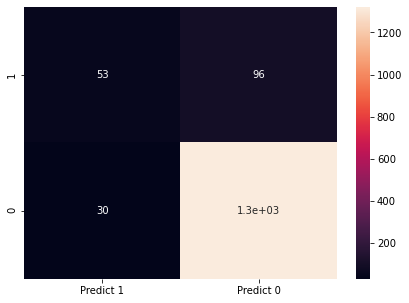

In [193]:
#Build confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [194]:
#Accuracy
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
#Precision
print ( 'Precision : ',metrics.precision_score(y_test, y_predict, labels=[1, 0]))
print()
#Recall
print ( 'Recall : ',metrics.recall_score(y_test, y_predict, labels=[1, 0]))
print()
#f1_score
print ( 'F1 Score: : ',metrics.f1_score(y_test, y_predict, labels=[1, 0]))
print()
#roc_auc_score
print ( 'Roc Auc Score : ',metrics.roc_auc_score(y_test, y_predict, average='macro'))

Training accuracy 0.9148571428571428

Testing accuracy 0.916

Precision :  0.6385542168674698

Recall :  0.35570469798657717

F1 Score: :  0.4568965517241379

Roc Auc Score :  0.6667494622427335


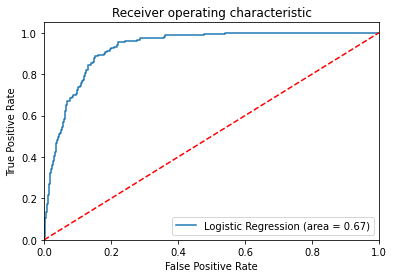

In [195]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [196]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
5,Education,0.15
3,Family,0.13
4,CCAvg,0.06
1,Income,0.04
8,CD Account,0.04
0,Age,0.00
2,ZIP Code,0.00
6,Mortgage,0.00
7,Securities Account,0.00
9,Online,0.00


#### Business Analysis

##### `The confusion matrix interpretation:`

True Positives (TP): we correctly predicted that **53 customers** will apply for a personal loan 

True Negatives (TN): we correctly predicted that  **133 customers** will not apply for personal loan 

False Positives (FP): we incorrectly predicted that **30 customers** will apply for a loan -  Type I error

False Negatives (FN): we incorrectly predicted that **96 customers** will not apply for a loan - Type II error

##### `Most Relevant Features`

Based on the coefficients value, "Education" and "Family" appear to be the top features which influence the model's output. 

##### `Most Important Metric`

Based on the confusion matrix above, the model has high False Negatives which indicates lost opportunities. However, from a banking business perspective it is less risky to lose potential customers than give loans to people than may default. It is less expensive not to lend than it is to have bad loans. It therefore makes more business sense not to offer loans than the reverse which gives credence to using our model.

It is important to note that the bank wants to give loans only to the customers who are eligible. That means a **lower number of False Positives (FP)**. If the FP is high, the bank would lose money. As such, **Precision is the important metric** as it indicates how high FP is in relation to TP. 


Upon achieving the desired accuracy, we can deploy the model for practical use. Thus the bank would be able to predict which customers would be eligible and accept a personal loan.
 